# Things I did to find the missing dependencies

## Dumpbin

https://www.intel.com/content/www/us/en/docs/dpcpp-cpp-compiler/developer-guide-reference/2023-0/redistribute-libraries-when-deploying-apps.html

```bat
C:\Users\eduardos\GitHubRepos\AlgorithmsRepo\Algorithms\Physics Research\Matrix Hamiltonian\Computations\C\SYCL\build>dumpbin /DEPENDENTS Hamiltonian-SYCL.dll
Microsoft (R) COFF/PE Dumper Version 14.39.33523.0
Copyright (C) Microsoft Corporation.  All rights reserved.


Dump of file Hamiltonian-SYCL.dll

File Type: DLL

  Image has the following dependencies:

    sycl7.dll
    MSVCP140.dll
    KERNEL32.dll
    VCRUNTIME140.dll
    api-ms-win-crt-runtime-l1-1-0.dll
    api-ms-win-crt-string-l1-1-0.dll
    api-ms-win-crt-heap-l1-1-0.dll
    api-ms-win-crt-environment-l1-1-0.dll
    api-ms-win-crt-stdio-l1-1-0.dll

  Summary

        3000 .data
        1000 .pdata
        A000 .rdata
        1000 .reloc
       16000 .text
        1000 .text.st
        1000 .tgtimg
        2000 _RDATA
        4000 __CLANG_

```

## Dependencies

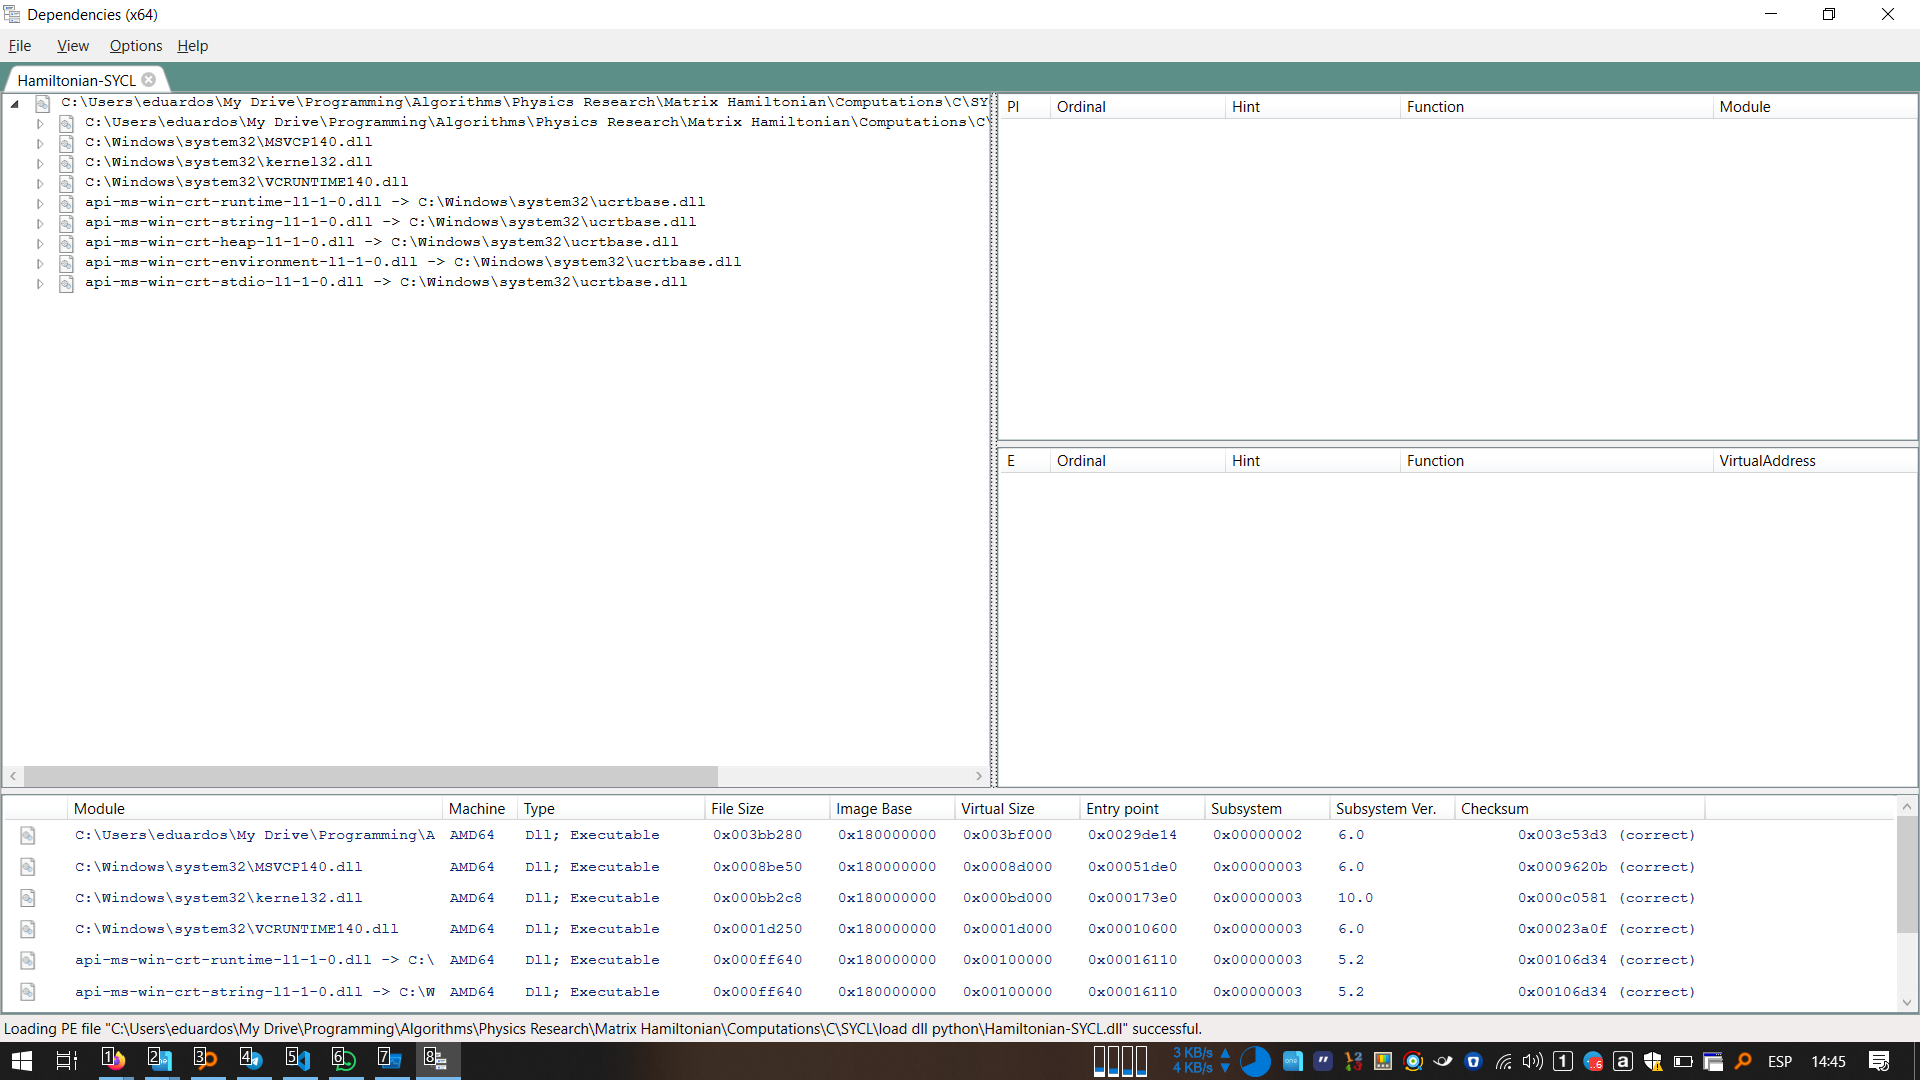

## Procmon64

https://community.intel.com/t5/Intel-Fortran-Compiler/Loading-a-Fortran-dll-from-python-in-visual-studio/m-p/1297014
https://community.intel.com/t5/Intel-Fortran-Compiler/DLL-Dependencies/m-p/863027

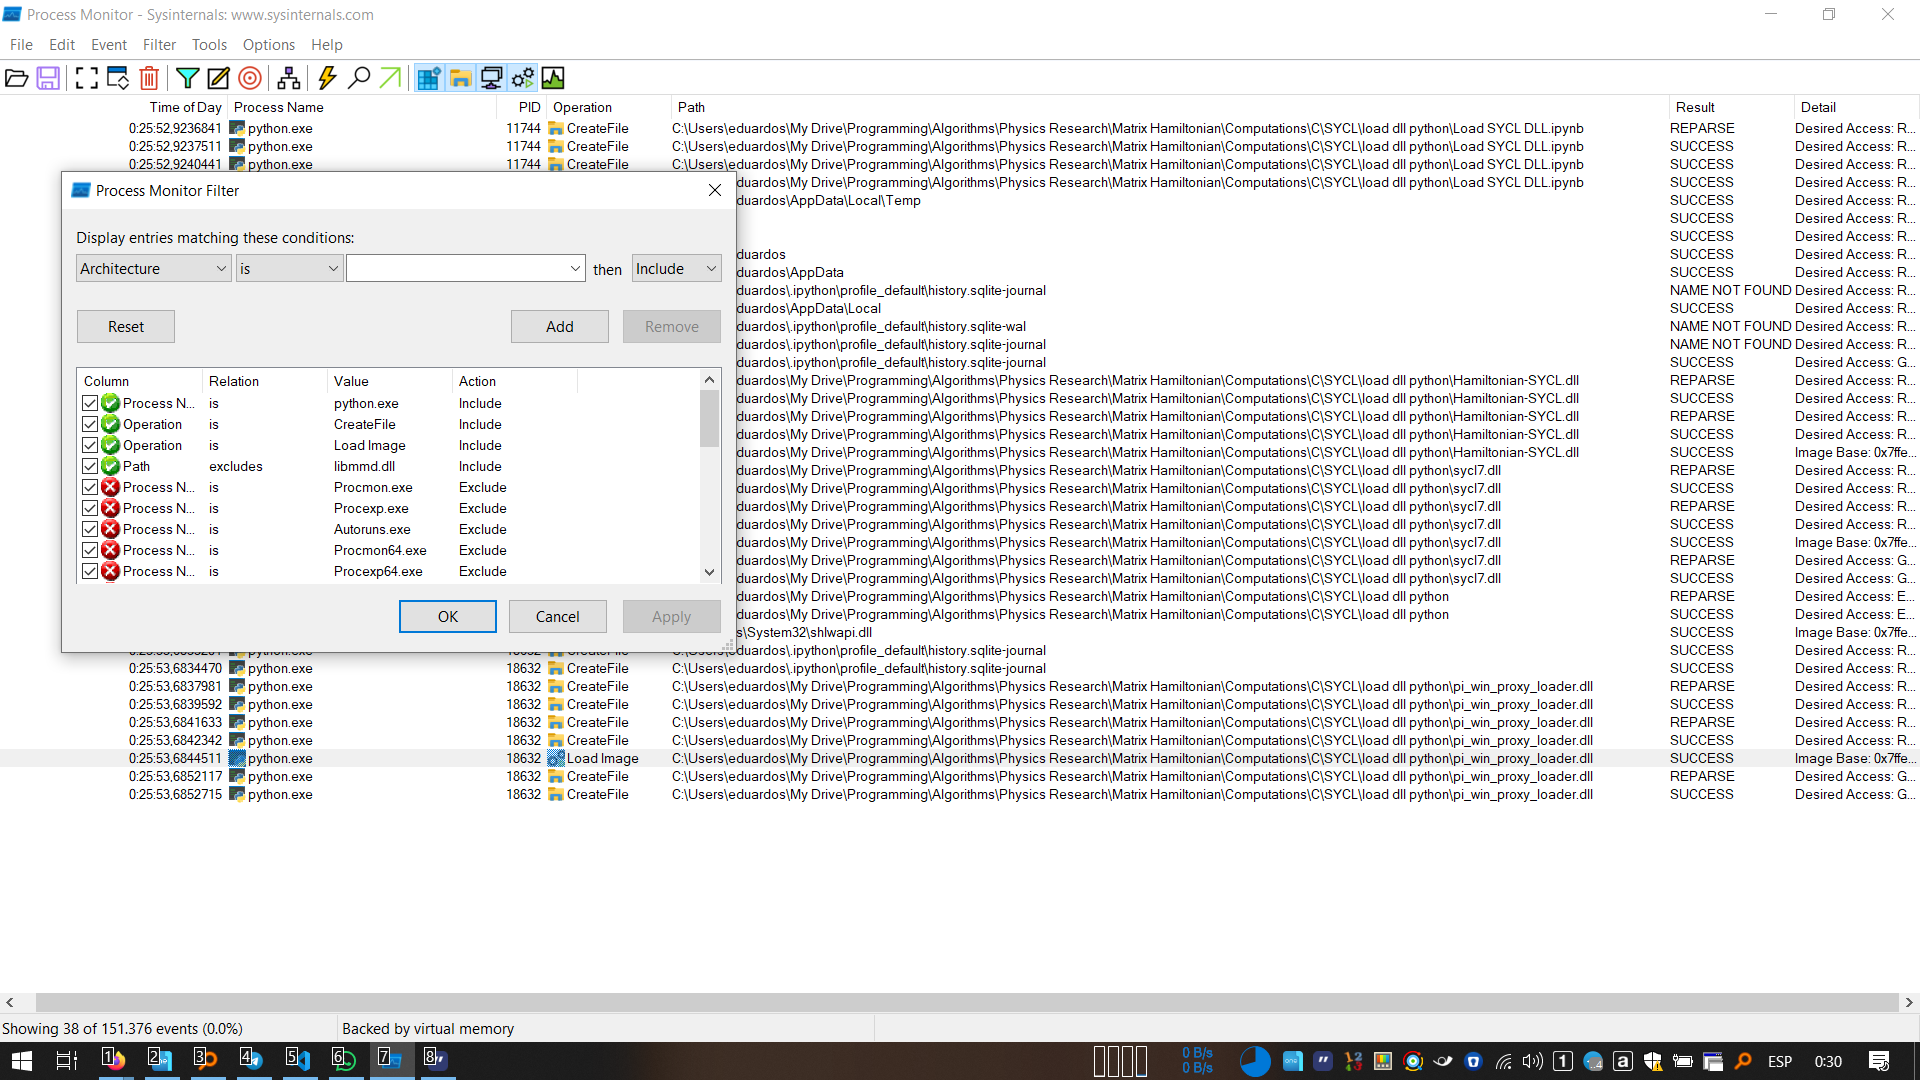

### Executing the exe from explorer

* Will throw up complaing dialogs with the missing dependencies
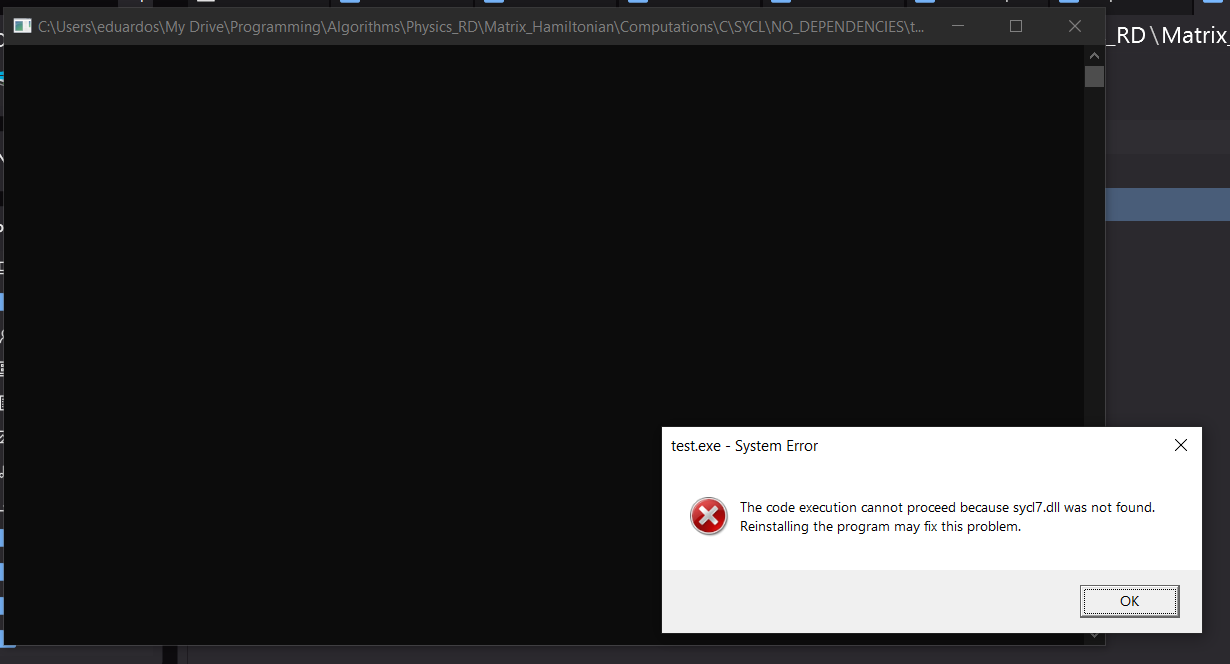

# Things I tried to run the code

### Test.exe


* test.exe runs sucessfully when:
    * it is run from a cli that has run C:\Program Files (x86)\Intel\oneAPI\setvars.bat
    * but NOT when run from that same cli in the folder that contains my best attempt at finding the dependencies (see above)

```bat
C:\Users\eduardos\GitHubRepos\AlgorithmsRepo\Algorithms\Physics_RD\Matrix_Hamiltonian\Computations\C\SYCL>.\NO_DEPENDENCIES\test.exe

C:\Users\eduardos\GitHubRepos\AlgorithmsRepo\Algorithms\Physics_RD\Matrix_Hamiltonian\Computations\C\SYCL>.\WITH_DEPENDENCIES\test.exe
N: 1000000
First 10 elements of vec: {0, 0, 0, 0, 0, 0, 0, 0, 0, 1}
Caught SYCL exception: No device of requested type available. Please check https://software.intel.com/content/www/us/en/develop/articles/intel-oneapi-dpcpp-system-requirements.html -1 (PI_ERROR_DEVICE_NOT_FOUND)

C:\Users\eduardos\GitHubRepos\AlgorithmsRepo\Algorithms\Physics_RD\Matrix_Hamiltonian\Computations\C\SYCL>"C:\Program Files (x86)\Intel\oneAPI\setvars.bat"
:: initializing oneAPI environment...
   Initializing Visual Studio command-line environment...
   Visual Studio version 17.9.6 environment configured.
   "C:\Program Files\Microsoft Visual Studio\2022\Community\"
   Visual Studio command-line environment initialized for: 'x64'
:  compiler -- latest
:  debugger -- latest
:  dev-utilities -- latest
:  dpl -- latest
:  ocloc -- latest
:  tbb -- latest
:: oneAPI environment initialized ::

C:\Users\eduardos\GitHubRepos\AlgorithmsRepo\Algorithms\Physics_RD\Matrix_Hamiltonian\Computations\C\SYCL>.\NO_DEPENDENCIES\test.exe
N: 1000000
First 10 elements of vec: {0, 0, 0, 0, 0, 0, 0, 0, 0, 1}
Device: Intel(R) Iris(R) Xe Graphics
First 10 elements of res: {0.111111, 0.125, 0.142857, 0.166667, 0.2, 0.25, 0.333333, 0.5, 1, -5.65794}
Time taken by function: 27seconds

C:\Users\eduardos\GitHubRepos\AlgorithmsRepo\Algorithms\Physics_RD\Matrix_Hamiltonian\Computations\C\SYCL>.\WITH_DEPENDENCIES\test.exe
N: 1000000
First 10 elements of vec: {0, 0, 0, 0, 0, 0, 0, 0, 0, 1}
Caught SYCL exception: No device of requested type available. Please check https://software.intel.com/content/www/us/en/develop/articles/intel-oneapi-dpcpp-system-requirements.html -1 (PI_ERROR_DEVICE_NOT_FOUND)

C:\Users\eduardos\GitHubRepos\AlgorithmsRepo\Algorithms\Physics_RD\Matrix_Hamiltonian\Computations\C\SYCL>
```

### dll from VSCode Python
* This code is being run from a kernel in a conda environment that loads the oneapi initialization script during activation.
* The script is loaded succesfully, the compiler is available in the VS terminal.
* When trying to load the dll in the folder with no dependencies, the load fails
* Loading succeds in the folder with the dependencies but the python kernel CRASHES when calling the function (however see how this case fails in the case of test.exe)


### dll from python cli

```bat
(base) C:\Users\eduardos\GitHubRepos\AlgorithmsRepo\Algorithms\Physics_RD\Matrix_Hamiltonian\Computations\C\SYCL>python "Load SYCL DLL.py"
*********************
['NO_DEPENDENCIES\\Hamiltonian-SYCL.dll', 'WITH_DEPENDENCIES\\Hamiltonian-SYCL.dll']


*********************
WITH_DEPENDENCIES\Hamiltonian-SYCL.dll


<CDLL 'C:\Users\eduardos\GitHubRepos\AlgorithmsRepo\Algorithms\Physics_RD\Matrix_Hamiltonian\Computations\C\SYCL\WITH_DEPENDENCIES\Hamiltonian-SYCL.dll', handle 7fff47f70000 at 0x221a1324b50>
SYCL exception.

(base) C:\Users\eduardos\GitHubRepos\AlgorithmsRepo\Algorithms\Physics_RD\Matrix_Hamiltonian\Computations\C\SYCL>"C:\Program Files (x86)\Intel\oneAPI\setvars.bat"
:: initializing oneAPI environment...
   Initializing Visual Studio command-line environment...
   Visual Studio version 17.9.6 environment configured.
   "C:\Program Files\Microsoft Visual Studio\2022\Community\"
   Visual Studio command-line environment initialized for: 'x64'
:  compiler -- latest
:  debugger -- latest
:  dev-utilities -- latest
:  dpl -- latest
:  ocloc -- latest
:  tbb -- latest
:: oneAPI environment initialized ::

(base) C:\Users\eduardos\GitHubRepos\AlgorithmsRepo\Algorithms\Physics_RD\Matrix_Hamiltonian\Computations\C\SYCL>python
"Load SYCL DLL.py"
*********************
['NO_DEPENDENCIES\\Hamiltonian-SYCL.dll', 'WITH_DEPENDENCIES\\Hamiltonian-SYCL.dll']


*********************
WITH_DEPENDENCIES\Hamiltonian-SYCL.dll


<CDLL 'C:\Users\eduardos\GitHubRepos\AlgorithmsRepo\Algorithms\Physics_RD\Matrix_Hamiltonian\Computations\C\SYCL\WITH_DEPENDENCIES\Hamiltonian-SYCL.dll', handle 7fff47f70000 at 0x1e8c540ef10>
SYCL exception.
```

# VScode Python code

### Float

In [1]:
import ctypes
import numpy as np

In [2]:
import os
import glob

In [4]:
dir = os.getcwd()
# Correctly format the search pattern to include spaces
search_pattern = os.path.join(dir, '**','Hamiltonian-SYCL.dll')

# Use glob to find all DLL files in the directory and subdirectories
dll_paths = glob.glob(search_pattern, recursive=True)

[os.sep.join(f.split(os.sep)[-2:]) for f in dll_paths]

['NO_DEPENDENCIES\\Hamiltonian-SYCL.dll',
 'WITH_DEPENDENCIES\\Hamiltonian-SYCL.dll']

In [5]:
# Example NumPy array
ln=5
vec = np.array([1.0, 2.0, 3.0, 4.0, 5.0], dtype=np.float32)
res = np.zeros((ln), dtype=np.float32)

# Convert NumPy array to C-compatible array
c_vec = (ctypes.c_float * ln)(*vec)
c_res = (ctypes.c_float * ln)(*res)

### 'NO_DEPENDENCIES\\Hamiltonian-SYCL.dll'

In [6]:
# Load the DLL
dll = dll_paths[0]
# print("DLL:", os.path.basename(dll))
mylib = ctypes.CDLL(dll)

FileNotFoundError: Could not find module 'c:\Users\eduardos\GitHubRepos\AlgorithmsRepo\Algorithms\Physics_RD\Matrix_Hamiltonian\Computations\C\SYCL\NO_DEPENDENCIES\Hamiltonian-SYCL.dll' (or one of its dependencies). Try using the full path with constructor syntax.

In [ ]:
# Define the function prototype by its name
mylib.Hamiltonian_SYCL_f.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_size_t, ctypes.POINTER(ctypes.c_float)]
mylib.Hamiltonian_SYCL_f.restype = None

In [ ]:
mylib.Hamiltonian_SYCL_f(c_res, ln, c_vec)

: 

### 'WITH_DEPENDENCIES\\Hamiltonian-SYCL.dll'

In [7]:
# Load the DLL
dll = dll_paths[1]
# print("DLL:", os.path.basename(dll))
mylib = ctypes.CDLL(dll)

In [8]:
# Define the function prototype by its name
mylib.Hamiltonian_SYCL_f.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_size_t, ctypes.POINTER(ctypes.c_float)]
mylib.Hamiltonian_SYCL_f.restype = None

In [9]:
mylib.Hamiltonian_SYCL_f(c_res, ln, c_vec)

: 

In [ ]:

result_np = np.ctypeslib.as_array(c_res)